# 🎯 Credit Risk Prediction – Machine Learning Project

## 📌 Problem Statement

Credit risk prediction is a critical task in the banking and financial services industry. Financial institutions provide loans to customers with the expectation that they will repay the borrowed amount on time. However, some borrowers fail to meet their repayment obligations, leading to loan defaults and financial losses.
This project aims to build a machine learning model that can predict whether a borrower is likely to default on a loan based on their financial and demographic information. By identifying high-risk borrowers in advance, lenders can make informed loan approval decisions, reduce potential losses, and improve overall risk management.

---

### 🧠 Problem Type: Classification
### 🎯 Target Variable: Loan Status (Default / Non-Default)
- 1 → Default (High Credit Risk)
- 0 → Non-Default (Low Credit Risk)
### ⚙️ Approach: Supervised Machine Learning

---

## 1. Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("data/application_train.csv")

In [2]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 📐 Dataset Shape

In [3]:
df.shape

(307511, 122)

### 🏷️ Target Variable Overview

In [4]:
df['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [5]:
df['TARGET'].value_counts(normalize=True) * 100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

### 🧾 Feature Types Identification

In [6]:
df.dtypes.value_counts()

float64    65
int64      41
object     16
Name: count, dtype: int64

### 📊 Numerical vs Categorical Features

In [7]:
numerical_features = df.select_dtypes(include =['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

len(numerical_features), len(categorical_features)

(106, 16)

### ❓ Missing Values Overview

In [8]:
missing_values = df.isnull().mean().sort_values(ascending=False)
missing_values.head(10)

COMMONAREA_AVG              0.698723
COMMONAREA_MODE             0.698723
COMMONAREA_MEDI             0.698723
NONLIVINGAPARTMENTS_MEDI    0.694330
NONLIVINGAPARTMENTS_MODE    0.694330
NONLIVINGAPARTMENTS_AVG     0.694330
FONDKAPREMONT_MODE          0.683862
LIVINGAPARTMENTS_AVG        0.683550
LIVINGAPARTMENTS_MEDI       0.683550
LIVINGAPARTMENTS_MODE       0.683550
dtype: float64

## 2. Data Cleaning & Preprocessing

### Separate Target & Features

In [9]:
X = df.drop(columns=['TARGET'])
y = df['TARGET']

print(X.shape, y.shape)

(307511, 121) (307511,)


### Identify Feature Types

In [10]:
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

print(f"Categorical features: {len(categorical_cols)}")
print(f"Numerical features: {len(numerical_cols)}")

Categorical features: 16
Numerical features: 105


### 🧮 Numerical Features – Median Imputation

In [11]:
from sklearn.impute import SimpleImputer

num_imputer = SimpleImputer(strategy='median')
X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])

### 🏷️ Categorical Features – Most Frequent Imputation

In [12]:
cat_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])

### Encode Categorical Variables

In [13]:
from sklearn.preprocessing import OneHotEncoder

X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

### Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Train–Test Split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

## 3. Exploratory Data Analysis (EDA)

### Numerical Features vs TARGET

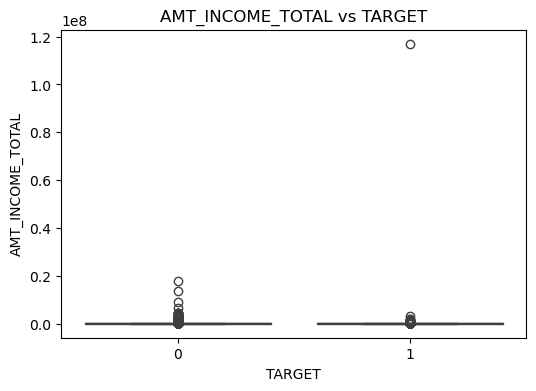

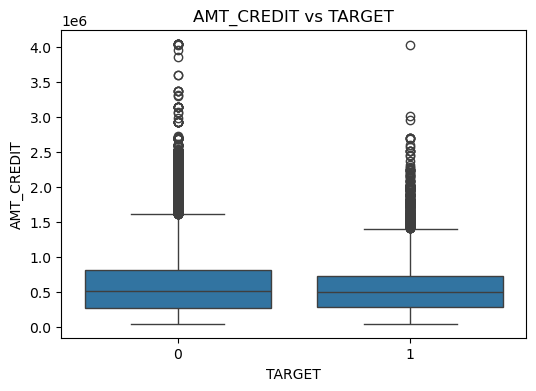

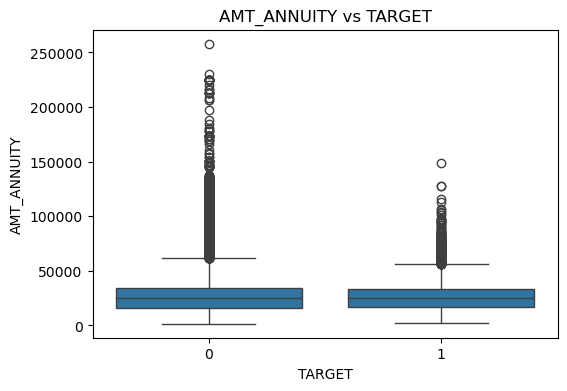

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

num_features_sample = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']

for col in num_features_sample:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=y, y=df[col])
    plt.title(f"{col} vs TARGET")
    plt.show()

### Distribution Analysis (Skewness Check)

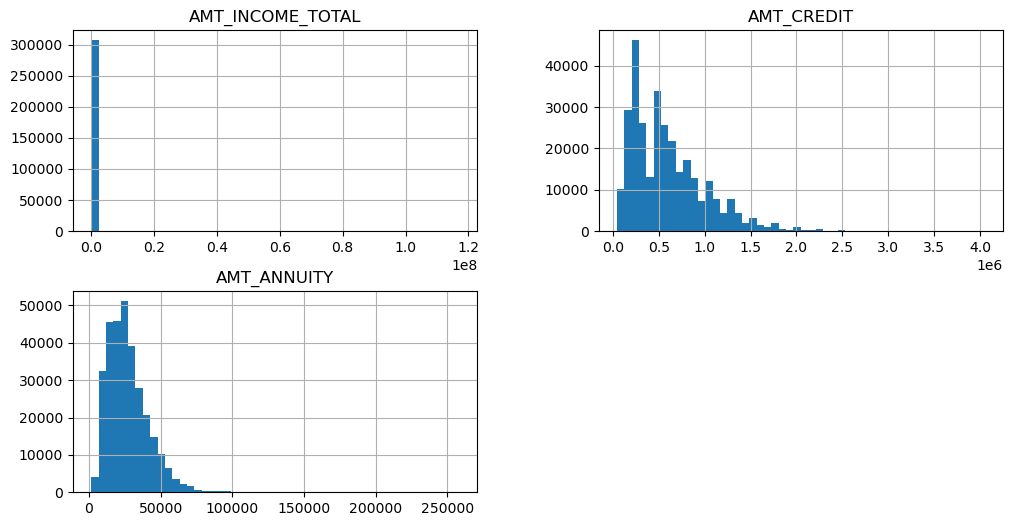

In [17]:
df[num_features_sample].hist(bins=50, figsize=(12,6))
plt.show()

### Categorical Features vs TARGET

In [18]:
cat_features_sample = ['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE']

for col in cat_features_sample:
    default_rate = df.groupby(col)['TARGET'].mean().sort_values(ascending=False)
    print(f"\nDefault Rate by {col}")
    print(default_rate)


Default Rate by NAME_CONTRACT_TYPE
NAME_CONTRACT_TYPE
Cash loans         0.083459
Revolving loans    0.054783
Name: TARGET, dtype: float64

Default Rate by NAME_INCOME_TYPE
NAME_INCOME_TYPE
Maternity leave         0.400000
Unemployed              0.363636
Working                 0.095885
Commercial associate    0.074843
State servant           0.057550
Pensioner               0.053864
Businessman             0.000000
Student                 0.000000
Name: TARGET, dtype: float64


### Correlation with TARGET (Numerical)

In [19]:
corr = df[numerical_cols.tolist() + ['TARGET']].corr()
target_corr = corr['TARGET'].sort_values(ascending=False)

target_corr.head(10)

TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
Name: TARGET, dtype: float64

### Missing Value vs TARGET Relationship

In [20]:
missing_cols = missing_values[missing_values > 0.5].index

for col in missing_cols[:5]:
    print(col, df.groupby(df[col].isnull())['TARGET'].mean())

COMMONAREA_AVG COMMONAREA_AVG
False    0.069102
True     0.085742
Name: TARGET, dtype: float64
COMMONAREA_MODE COMMONAREA_MODE
False    0.069102
True     0.085742
Name: TARGET, dtype: float64
COMMONAREA_MEDI COMMONAREA_MEDI
False    0.069102
True     0.085742
Name: TARGET, dtype: float64
NONLIVINGAPARTMENTS_MEDI NONLIVINGAPARTMENTS_MEDI
False    0.069130
True     0.085835
Name: TARGET, dtype: float64
NONLIVINGAPARTMENTS_MODE NONLIVINGAPARTMENTS_MODE
False    0.069130
True     0.085835
Name: TARGET, dtype: float64


## 4. Feature Engineering

### Financial Ratio Features

#### 🔸 Income vs Credit Burden

In [21]:
df['CREDIT_INCOME_RATIO'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']

#### 🔸 Annuity vs Income

In [22]:
df['ANNUITY_INCOME_RATIO'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']

#### Credit vs Annuity (Loan Duration proxy)

In [23]:
df['CREDIT_ANNUITY_RATIO'] = df['AMT_CREDIT'] / df['AMT_ANNUITY']

### Age & Employment Based Features

#### 🔸 Age (years)

In [24]:
df['AGE_YEARS'] = (-df['DAYS_BIRTH']) / 365

#### 🔸 Employment length

In [25]:
df['EMPLOYMENT_YEARS'] = (-df['DAYS_EMPLOYED']) / 365

In [26]:
df['EMPLOYMENT_YEARS'] = df['EMPLOYMENT_YEARS'].replace(365243/365, np.nan)

### Missing Value Indicator Features

In [27]:
high_missing_cols = missing_values[missing_values > 0.6].index

for col in high_missing_cols:
    df[col + '_MISSING_FLAG'] = df[col].isnull().astype(int)

### Aggregation Features

In [28]:
prev_df = pd.read_csv('data/previous_application.csv')
prev_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
prev_agg = prev_df.groupby('SK_ID_CURR').agg({
    'AMT_CREDIT': ['mean', 'max'],
    'DAYS_DECISION': 'mean'
})

prev_agg.columns = [
    'PREV_CREDIT_MEAN',
    'PREV_CREDIT_MAX',
    'PREV_DECISION_MEAN'
]

prev_agg.reset_index(inplace=True)

In [30]:
df = df.merge(prev_agg, on='SK_ID_CURR', how='left')

In [31]:
bureau_df = pd.read_csv('data/bureau.csv')
bureau_df.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [32]:
bureau_agg = bureau_df.groupby('SK_ID_CURR').agg({
    'DAYS_CREDIT': ['mean'],
    'AMT_CREDIT_SUM': ['mean', 'max'],
    'AMT_CREDIT_SUM_DEBT': ['mean'],
    'CREDIT_DAY_OVERDUE': ['max']
})

In [33]:
bureau_agg.columns = [
    'BUREAU_DAYS_CREDIT_MEAN',
    'BUREAU_CREDIT_SUM_MEAN',
    'BUREAU_CREDIT_SUM_MAX',
    'BUREAU_CREDIT_DEBT_MEAN',
    'BUREAU_OVERDUE_MAX'
]

bureau_agg.reset_index(inplace=True)

In [34]:
df = df.merge(bureau_agg, on='SK_ID_CURR', how='left')

In [35]:
new_num_cols = df.select_dtypes(include=['float64', 'int64']).columns

df[new_num_cols] = df[new_num_cols].fillna(df[new_num_cols].median())

### Log Transformation (Skewness Fix)

In [36]:
df = df.copy()
skewed_features = ['AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_ANNUITY']

for col in skewed_features:
    df[col + '_LOG'] = np.log1p(df[col])

### Encoding Categorical Features

In [37]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

### Feature Cleanup

In [38]:
drop_cols = ['SK_ID_CURR']
df.drop(columns=drop_cols, inplace=True)

## 5. Baseline Model Building

### Prepare Features & Target

In [39]:
X = df.drop(columns=['TARGET'])
y = df['TARGET']

print(X.shape, y.shape)

(307511, 261) (307511,)


### Train–Test Split (No Data Leakage)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

### Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train Logistic Regression Model

In [42]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    n_jobs=-1
)

log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1)

### Model Evaluation

#### ▶️ Predictions

In [43]:
y_pred = log_reg.predict(X_test_scaled)
y_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

#### ▶️ Metrics

In [44]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))

Accuracy: 0.692323951677154
ROC-AUC: 0.7530602611930262
              precision    recall  f1-score   support

           0       0.96      0.69      0.81     56538
           1       0.16      0.68      0.26      4965

    accuracy                           0.69     61503
   macro avg       0.56      0.69      0.53     61503
weighted avg       0.90      0.69      0.76     61503



### Confusion Matrix (Business View)

In [45]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[39180, 17358],
       [ 1565,  3400]])

### Feature Importance

In [46]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': log_reg.coef_[0]
})

feature_importance['abs_coef'] = feature_importance['coefficient'].abs()
feature_importance.sort_values(by='abs_coef', ascending=False).head(10)

,feature,coefficient,abs_coef
108,EMPLOYMENT_YEARS,-4.018349,4.018349
7,DAYS_EMPLOYED,4.018349,4.018349
150,NAME_INCOME_TYPE_Pensioner,-3.044691,3.044691
248,ORGANIZATION_TYPE_XNA,-2.805216,2.805216
12,FLAG_EMP_PHONE,1.321606,1.321606
154,NAME_INCOME_TYPE_Working,1.272786,1.272786
158,NAME_EDUCATION_TYPE_Secondary / secondary special,1.188453,1.188453
148,NAME_INCOME_TYPE_Commercial associate,1.051834,1.051834
134,AMT_CREDIT_LOG,1.023965,1.023965
155,NAME_EDUCATION_TYPE_Higher education,1.008346,1.008346


## 6. Advanced Model Training

### Decision Tree

#### ▶️ Train Decision Tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=50,
    class_weight='balanced',
    random_state=42
)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=50, random_state=42)

#### ▶️ Evaluate Decision Tree

In [48]:
from sklearn.metrics import roc_auc_score

dt_prob = dt_model.predict_proba(X_test)[:, 1]
dt_auc = roc_auc_score(y_test, dt_prob)

dt_auc

np.float64(0.7170991040363659)

### Random Forest

#### ▶️ Train Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=50,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_split=50, n_estimators=200, n_jobs=-1,
                       random_state=42)

#### ▶️ Evaluate Random Forest

In [50]:
rf_prob = rf_model.predict_proba(X_test)[:, 1]
rf_auc = roc_auc_score(y_test, rf_prob)

rf_auc

np.float64(0.7399800905678245)

### Gradient Boosting

#### ▶️ Train Gradient Boosting Model

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=200,
                           random_state=42)

#### ▶️ Evaluate Gradient Boosting

In [52]:
gb_prob = gb_model.predict_proba(X_test)[:, 1]
gb_auc = roc_auc_score(y_test, gb_prob)

gb_auc

np.float64(0.7621203994126775)

### Model Comparison

In [53]:
model_performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'ROC_AUC': [0.753, dt_auc, rf_auc, gb_auc]
})

model_performance

,Model,ROC_AUC
0,Logistic Regression,0.753000
1,Decision Tree,0.717099
2,Random Forest,0.739980
3,Gradient Boosting,0.762120


### Basic Hyperparameter Tuning (Random Forest)

In [54]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [8, 10],
    'min_samples_split': [30, 50]
}

rf_grid = GridSearchCV(
    RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1
)

rf_grid.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'min_samples_split': [30, 50],
                         'n_estimators': [100, 200]},
             scoring='roc_auc')

### ▶️ Best Model

In [55]:
rf_grid.best_params_
rf_grid.best_score_

np.float64(0.7337876285622836)

## 7. Model Evaluation

### Confusion Matrix

In [56]:
from sklearn.metrics import confusion_matrix

y_pred_gb = gb_model.predict(X_test)
confusion_matrix(y_test, y_pred_gb)

array([[56495,    43],
       [ 4905,    60]])

### Precision, Recall, F1-Score

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.58      0.01      0.02      4965

    accuracy                           0.92     61503
   macro avg       0.75      0.51      0.49     61503
weighted avg       0.89      0.92      0.88     61503



### ROC-AUC

In [58]:
from sklearn.metrics import roc_auc_score

gb_prob = gb_model.predict_proba(X_test)[:,1]
roc_auc_score(y_test, gb_prob)

np.float64(0.7621203994126775)

### Compare All Models

In [59]:
models = {
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "Gradient Boosting": gb_model
}

for name, model in models.items():
    prob = model.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test, prob)
    print(name, "ROC-AUC:", auc)

Decision Tree ROC-AUC: 0.7170991040363659
Random Forest ROC-AUC: 0.7399800905678245
Gradient Boosting ROC-AUC: 0.7621203994126775


 ## 8. Final Model Selection

#### ✅ Selected Model → Gradient Boosting Classifier
Reason for Selection:

- Highest ROC-AUC score
- Better handling of non-linear relationships
- Lower overfitting compared to single decision tree
- Strong performance on imbalanced dataset

### 🟩 🔹 Store Final Model Prediction Probability

In [60]:
final_model = gb_model

final_pred = final_model.predict(X_test)
final_prob = final_model.predict_proba(X_test)[:,1]

### 🟩 🔹 Final Model ROC-AUC

In [61]:
from sklearn.metrics import roc_auc_score

final_auc = roc_auc_score(y_test, final_prob)
print("Final Model ROC-AUC:", final_auc)

Final Model ROC-AUC: 0.7621203994126775


## 9. Model Saving

In [62]:
import joblib
import os

In [63]:
os.makedirs("model", exist_ok=True)

#### Save Final Model

In [64]:
final_model = gb_model
joblib.dump(final_model, "model/credit_risk_model.pkl")

['model/credit_risk_model.pkl']

In [65]:
joblib.dump(scaler, "model/scaler.pkl")

['model/scaler.pkl']

In [66]:
joblib.dump(X.columns.tolist(), "model/feature_columns.pkl")

['model/feature_columns.pkl']

In [67]:
loaded_model = joblib.load("model/credit_risk_model.pkl")

print("Model Loaded Successfully ✅")

Model Loaded Successfully ✅


### Test Prediction

In [68]:
sample_data = X_test.iloc[:5]

loaded_model.predict(sample_data)

array([0, 0, 0, 0, 0])

### Feature Importance

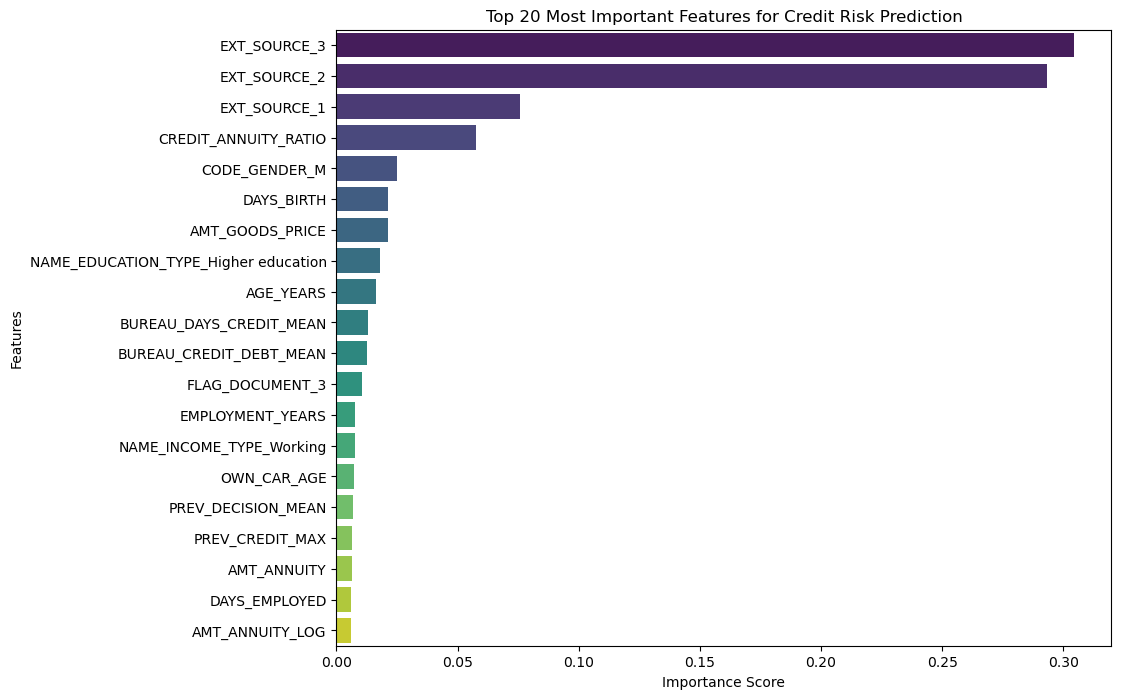

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
})

feature_importance = feature_importance.sort_values(by='importance', ascending=False).head(20)

plt.figure(figsize=(10, 8))
sns.barplot(
    x='importance', 
    y='feature', 
    data=feature_importance, 
    palette='viridis', 
    hue='feature',     
    legend=False       
)
plt.title('Top 20 Most Important Features for Credit Risk Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()